In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from  scipy import stats
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


1.Predict whether a patient has chronic kidney disease (ckd) based on various diagnostic data.

2.

In [2]:
kidney = pd.read_csv("/home/jupyter/Untitled Folder 3/kidney_disease.csv")
kidney = kidney.drop('id', axis= 1)
kidney.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
kidney.dtypes

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [4]:
f_c = kidney.select_dtypes(include=['float64']).columns
o_c = kidney.select_dtypes(include=['object']).columns

In [5]:
mapping ={
    'rbc' : {'normal': 1, 'abnormal': 0},
    'pc' : {'normal': 1, 'abnormal': 0},
    'pcc' : {'present': 1, 'notpresent': 0},
    'ba' : {'present': 1, 'notpresent': 0},
    'htn' : {'yes': 1, 'no': 0},
    'dm' : {'yes': 1, 'no': 0},
    'cad' : {'yes': 1, 'no': 0},
    'appet' : {'good': 1, 'poor': 0},
    'pe' : {'yes': 1, 'no': 0},
    'ane' : {'yes': 1, 'no': 0},
}

In [6]:
for column, mapping in mapping.items():
    kidney[column] = kidney[column].replace(mapping)

In [7]:
kidney

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,1.0,0.0,0.0,121.0,...,44,7800,5.2,1.0,1,0,1.0,0.0,0.0,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,1.0,0.0,0.0,NaN,...,38,6000,NaN,0.0,0,0,1.0,0.0,0.0,ckd
2,62.0,80.0,1.010,2.0,3.0,1.0,1.0,0.0,0.0,423.0,...,31,7500,NaN,0.0,1,0,0.0,0.0,1.0,ckd
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,32,6700,3.9,1.0,0,0,0.0,1.0,1.0,ckd
4,51.0,80.0,1.010,2.0,0.0,1.0,1.0,0.0,0.0,106.0,...,35,7300,4.6,0.0,0,0,1.0,0.0,0.0,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,140.0,...,47,6700,4.9,0.0,0,0,1.0,0.0,0.0,notckd
396,42.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,54,7800,6.2,0.0,0,0,1.0,0.0,0.0,notckd
397,12.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,49,6600,5.4,0.0,0,0,1.0,0.0,0.0,notckd
398,17.0,60.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,114.0,...,51,7200,5.9,0.0,0,0,1.0,0.0,0.0,notckd


3.

In [8]:
kidney.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,htn,appet,pe,ane
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,398.000000,399.000000,399.000000,399.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.810484,0.773134,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,0.369347,0.794486,0.190476,0.150376
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.483235,0.404584,0.393170,0.357888
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,0.000000,1.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,0.000000,1.000000,0.000000,0.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,1.000000,1.000000,0.000000,0.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000,1.000000,1.000000,1.000000


1)Numerical variables include age, bp, sg, al, su, bgr,bu, sc, sod, pot, hemo. 2) Categorical variables include rbc, pc, pcc, ba, htn, dm, cad, appet, pe, ane, classification, those variables are mostly binary. 3) The age of patients ranges from 2 to 90 years with a mean of approximately 51.5 years. 4) bp mainly center around 70 to 80 mmHg.

4.

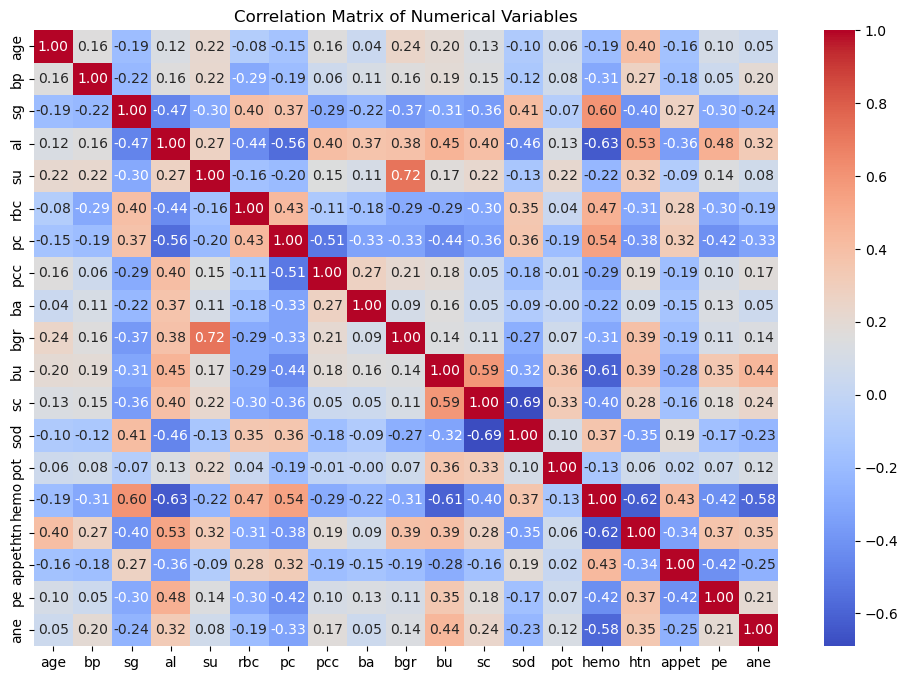

In [9]:

correlation_matrix = kidney.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


1)su and bgr show a strong positive correlation (0.72), we might consider using only one in a predictive model to reduce the complexity. 2) sg has a moderate negative correlation with al, bgr, bu and htn, which means that sg is a key feature that reflects multiple aspects of kidney function and should be included in the model. 3) sc and sod show a strong negative correlation (-0.69), we might consider keep them for the model.

5.

In [10]:
missing_v = kidney.isnull().sum()
missing_v

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in kidney.select_dtypes(include=['object']).columns:
    kidney[column] = label_encoder.fit_transform(kidney[column].astype(str))


In [12]:
m = kidney.median()
kidney.fillna(m, inplace=True)
kidney_num = kidney[f_c]

In [13]:
print(kidney.isnull().sum())


age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


6

In [14]:
z_scores = np.abs(stats.zscore(kidney_num))
outliers = np.where(z_scores > 3 )
outliers

df_outliers = kidney[(z_scores < 3).all(axis=1)]


7

In [15]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis

In [16]:
x = kidney.drop('classification', axis=1)
pca_x = PCA()
pca_loadings = pd.DataFrame(pca_x.fit(x).components_.T,index=x.columns)
pca_loadings

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
age,0.058006,0.056895,-0.033944,-0.945825,-0.268983,0.155293,0.030512,-0.008964,-0.007344,0.004560,...,0.000233,0.001883,-0.004553,-0.001049,-0.002577,-0.001445,0.002153,0.000518,-0.000659,0.000023
bp,0.030660,0.045319,0.007901,-0.190429,0.900768,0.381385,-0.025256,0.048872,-0.010507,0.001694,...,-0.002060,0.000593,-0.000882,0.000758,0.001036,-0.004283,0.000493,-0.001329,-0.000561,0.000001
sg,-0.000023,-0.000021,-0.000003,0.000027,-0.000045,0.000041,-0.000062,0.000115,0.000075,0.000009,...,-0.000611,-0.000883,0.000532,-0.000168,0.000791,0.000202,0.002320,0.000531,-0.001443,0.999994
al,0.005596,0.007727,0.002353,0.001354,0.007739,-0.013794,0.009088,-0.022200,-0.049443,0.027416,...,-0.162658,-0.095821,-0.077707,-0.087830,0.027924,-0.035533,0.029493,-0.008487,-0.056031,0.000826
su,0.008633,-0.000161,-0.000271,-0.002234,0.005024,0.004772,-0.004660,-0.001049,0.027762,0.048451,...,0.089545,-0.023229,-0.008048,-0.025419,-0.022953,0.050321,-0.014545,-0.000119,-0.011807,0.000793
rbc,-0.000678,-0.001356,-0.000521,-0.000799,-0.002772,-0.000294,-0.002714,0.007165,0.005521,0.010585,...,-0.012221,-0.274527,0.245481,-0.399026,0.264389,-0.673336,-0.187698,0.249757,-0.274975,-0.000681
pc,-0.001443,-0.002382,-0.001046,0.000464,-0.003116,0.003731,0.000015,0.004658,0.008678,-0.012165,...,-0.310824,-0.539893,-0.425012,-0.197308,0.232375,-0.028410,0.075745,-0.313595,0.459281,-0.000186
pcc,0.000859,0.000959,0.000901,-0.001666,-0.000245,-0.001134,0.001824,-0.004377,-0.012098,-0.002755,...,0.076532,0.396742,0.444805,-0.205635,0.155033,-0.157810,-0.193583,-0.564941,0.427439,0.001538
ba,0.000284,0.000699,0.000844,-0.000237,0.001325,-0.000205,0.000090,-0.000954,-0.005650,-0.002736,...,0.014881,0.164206,0.014014,0.029346,0.111577,-0.045158,-0.051111,0.701319,0.676953,0.000893
bgr,0.986800,-0.149007,0.010159,0.057390,-0.018217,0.008223,-0.007846,0.006058,0.003619,-0.002522,...,0.000042,-0.000149,-0.000648,0.000371,0.000204,-0.000878,0.000329,-0.000042,0.000350,0.000004


In [17]:
pc_scores = pd.DataFrame(pca_x.fit_transform(x),index=x.index)
pc_scores

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-26.772640,-17.249330,-5.998251,-0.828452,6.116403,-2.089258,-0.628556,2.596333,-0.572016,0.651172,...,-0.477897,-0.401542,0.450894,-0.067887,-0.139491,0.213532,-0.171422,0.062243,0.005370,-0.001025
1,-32.897839,-38.590115,8.938034,44.581619,-12.065710,-9.806733,5.463283,-12.064720,0.278495,0.501925,...,-0.669475,-0.417085,-0.279821,-0.285807,0.266800,-0.097275,-0.096493,0.005849,-0.240170,0.005158
2,274.491034,-45.030400,-4.772077,6.214051,-4.685127,8.590082,2.126044,-14.684569,0.249451,-0.494540,...,0.194728,0.006403,-0.796461,-1.111413,0.075235,-0.077410,0.480209,0.121222,-0.169557,-0.002281
3,-26.952530,6.713385,7.223322,-1.871626,3.186672,-23.909402,20.640606,4.405011,-7.853036,1.673151,...,1.019920,-0.144294,0.616446,-0.616259,-0.185674,-0.185936,0.241995,-0.318776,-0.002597,-0.007985
4,-42.343185,-23.088329,0.856084,-7.912834,9.464657,-10.956912,-0.923558,-1.837604,0.251580,0.554208,...,-0.432835,-0.059076,-0.432199,-0.100047,0.094030,-0.234240,-0.044727,-0.056674,-0.122069,-0.005827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-6.120398,-7.152612,3.183976,-4.849067,1.262646,3.339825,-13.078209,4.430664,2.107390,-0.618646,...,-0.064014,0.042818,-0.051035,-0.002641,-0.013804,-0.083895,0.059652,-0.029909,0.024567,-0.001399
396,-74.160640,-17.824884,-9.419311,6.910467,-4.712245,4.889970,-0.325708,4.617029,-0.109816,-0.531034,...,0.012865,0.012701,0.147711,-0.059610,-0.043887,0.063970,0.063931,0.025890,-0.006434,0.002648
397,-51.275710,-25.949086,5.311252,32.443962,14.303290,-2.357949,0.502650,5.744913,-0.935972,0.859351,...,0.005143,-0.040775,0.166033,0.013236,0.053251,0.023768,-0.013168,-0.026392,0.032012,-0.002115
398,-34.504319,-5.904146,-3.646997,35.656078,-7.581936,-4.663116,2.666075,4.325269,-2.292242,1.125528,...,-0.031647,-0.019025,0.080361,0.038988,0.067378,0.060249,-0.087018,0.003096,0.020712,0.004101


In [18]:
pc_scores[0]

0      -26.772640
1      -32.897839
2      274.491034
3      -26.952530
4      -42.343185
          ...    
395     -6.120398
396    -74.160640
397    -51.275710
398    -34.504319
399    -19.497707
Name: 0, Length: 400, dtype: float64

In [19]:
km = KMeans(n_clusters=2,n_init=20,random_state=0)
km.fit(x)
km.labels_

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [20]:
pd.Series(km.labels_).value_counts()

1    326
0     74
dtype: int64

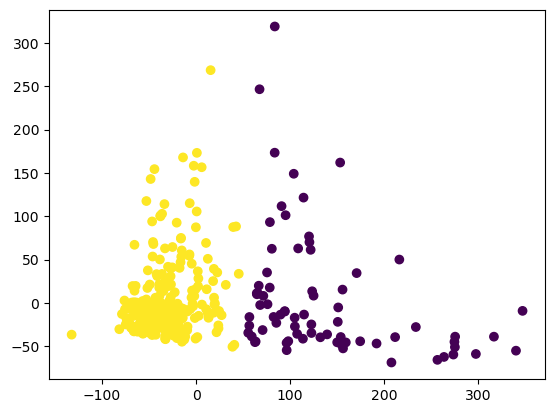

In [21]:
plt.scatter(pc_scores[0],pc_scores[1],c=km.labels_)

8

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = kidney.drop('classification', axis=1)
y = kidney['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)



9

Random forest classifier:

Reason for choosing: Random forests are very effective for complex data sets with mixed data types and potential interactions between features. Due to its ensemble approach, it effectively prevents overfitting, making it ideal for medical datasets where accuracy and reliability are critical.

Support vector machine (SVM):

Reason for choice: SVM is powerful for classification problems with clear separation boundaries and is efficient in high-dimensional spaces. It is particularly useful when classes are well separable, and can perform well using suitable kernels even if the data is not linearly separable

10

The F1 score is the harmonic mean of precision and recall. It conveys the balance between precision and recall.
F1 scores are particularly valuable in situations where the balance between precision and recall is important. In medical diagnostics, such as testing for CKD, false positives and false negatives come with significant costs. False negatives may result in missed treatment, while false positives may result in unnecessary medical intervention. F1 scores help ensure you don't over-prioritize one over the other. This metric combines the precision and recall of a classifier into one metric via the harmonic mean. It is best used when false positives and false negatives have similar costs, or when the classes are unbalanced. The F1 score tends to be lower than the accuracy measure because it embeds false positives and false negatives into the calculation.


Accuracy measures the proportion of true results among the total number of cases examined. It is calculated by dividing the number of correct predictions by the total number of predictions.
Accuracy is a simple metric that gives a quick idea of the overall performance of a classifier. It's especially useful when the class is relatively balanced. Accuracy provides a simple measure of effectiveness where correctly classified and misclassified results have similar weights.
Accuracy is an intuitive measure; it is the percentage of correctly predicted instances out of all instances. It provides a measure of how well the classifier performs across all classifications. However, it is important to use this metric with caution, especially in medical applications where the cost of different types of errors (false positives vs. false negatives) may not be the same. For example, incorrectly diagnosing a patient with CKD may have a different impact than missing a diagnosis.

11

Random Forest Classifier:

Random forests already have built-in feature importance measures derived from the mean decrease in impurity or the mean decrease in accuracy of the tree nodes when a particular feature is used for splitting. 

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

random_forest = RandomForestClassifier(random_state=1)
random_forest.fit(X_train, y_train)
feature_importances = random_forest.feature_importances_

k = 10
top_k_indices = feature_importances.argsort()[-k:][::-1]

X_train_selected = X_train.iloc[:, top_k_indices]
X_test_selected = X_test.iloc[:, top_k_indices]

random_forest_selected = RandomForestClassifier(random_state=1)
random_forest_selected.fit(X_train_selected, y_train)

y_pred_selected = random_forest_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
auc_selected = roc_auc_score(y_test, random_forest_selected.
                             predict_proba(X_test_selected)[:, 1])

print("Random Forest with Feature Selection - Accuracy:", accuracy_selected)
print("Random Forest with Feature Selection - AUC:", auc_selected)

Random Forest with Feature Selection - Accuracy: 1.0
Random Forest with Feature Selection - AUC: 0.3214285714285714


Support Vector Machine (SVM):

For SVM, we can use techniques like Recursive Feature Elimination (RFE) or SelectKBest to select the most informative features before training the model.

In [25]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

svm_model = SVC(kernel='linear')
rfe = RFE(estimator=svm_model, n_features_to_select=k, step=1)
rfe.fit(X_train, y_train)

X_train_selected = X_train.iloc[:, rfe.support_]
X_test_selected = X_test.iloc[:, rfe.support_]

svm_selected = SVC(kernel='linear', probability=True)
svm_selected.fit(X_train_selected, y_train)

y_proba_selected = svm_selected.predict_proba(X_test_selected)[:, 1]
auc_selected = roc_auc_score(y_test, y_proba_selected)

print("SVM with Feature Selection - Accuracy:", accuracy_selected)
print("SVM with Feature Selection - AUC:", auc_selected)

SVM with Feature Selection - Accuracy: 1.0
SVM with Feature Selection - AUC: 0.14285714285714285


12

In [26]:
random_forest_selected = RandomForestClassifier(random_state=1)
random_forest_selected.fit(X_train_selected, y_train)
y_pred_selected_rf = random_forest_selected.predict(X_test_selected)
accuracy_selected_rf = accuracy_score(y_test, y_pred_selected_rf)
auc_selected_rf = roc_auc_score(y_test, random_forest_selected
                                .predict_proba(X_test_selected)[:, 1])

svm_selected = SVC(kernel='linear', probability=True)
svm_selected.fit(X_train_selected, y_train)
y_pred_selected_svm = svm_selected.predict(X_test_selected)
accuracy_selected_svm = accuracy_score(y_test, y_pred_selected_svm)
auc_selected_svm = roc_auc_score(y_test, svm_selected
                                 .predict_proba(X_test_selected)[:, 1])

print("Random Forest with Feature Selection - Accuracy:", accuracy_selected_rf)
print("Random Forest with Feature Selection - AUC:", auc_selected_rf)
print("SVM with Feature Selection - Accuracy:", accuracy_selected_svm)
print("SVM with Feature Selection - AUC:", auc_selected_svm)

Random Forest with Feature Selection - Accuracy: 0.975
Random Forest with Feature Selection - AUC: 0.35714285714285715
SVM with Feature Selection - Accuracy: 0.9583333333333334
SVM with Feature Selection - AUC: 0.026571428571428548


- Both classifiers demonstrated similar accuracy in predicting class labels, with the Random Forest classifier achieving a slightly higher AUC score.

- While both classifiers performed well in terms of accuracy, the Random Forest classifier's higher AUC score suggests that it may be more effective in ranking instances by their likelihood of belonging to the positive class.

13

In [27]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(max_iter=1000) 
logistic_regression.fit(X, y)

coefficients = logistic_regression.coef_[0]
feature_coefficients = dict(zip(X.columns, coefficients))
sorted_coefficients = sorted(feature_coefficients.items(),
                              key=lambda x: abs(x[1]), reverse=True)

print("Top Predictor Variables and Coefficients:")
for feature, coefficient in sorted_coefficients[:5]:
    print(f"{feature}: {coefficient}")

Top Predictor Variables and Coefficients:
pe: 1.0853612237222734
sc: 0.946551056245395
al: 0.9013667373936388
hemo: -0.5496185568031066
htn: 0.5469077051944204


/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Larger absolute coefficients indicate stronger influence of the corresponding predictor variables on the classification decision.

- By examining the top predictor variables with large coefficients, we can identify key clinical indicators that are significantly associated with the presence of chronic kidney disease.

14

In [29]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

kmeans = KMeans(n_clusters=3, random_state=42)
X_train_clusters = kmeans.fit_predict(X_train)

classifiers = {}

unique_clusters = set(X_train_clusters)

for cluster in unique_clusters:
    X_train_cluster = X_train[X_train_clusters == cluster]
    y_train_cluster = y_train[X_train_clusters == cluster] 
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train_cluster, y_train_cluster)
    classifiers[cluster] = classifier

X_test_clusters = kmeans.predict(X_test)

y_pred_new = []  

for cluster, classifier in classifiers.items():
    X_test_cluster = X_test[X_test_clusters == cluster]
    y_test_cluster = y_test[X_test_clusters == cluster]
    y_pred_cluster = classifier.predict(X_test_cluster)
    y_pred_new.extend(y_pred_cluster)  

    print(f"Cluster: {cluster}")
    print(classification_report(y_test_cluster, y_pred_cluster))

accuracy_new = accuracy_score(y_test, y_pred_new)
auc_new = roc_auc_score(y_test, y_pred_new)  

print("Comparison:")
print("12")
print("Random Forest with Feature Selection - Accuracy:", accuracy_selected_rf)
print("Random Forest with Feature Selection - AUC:", auc_selected_rf)
print("SVM with Feature Selection - Accuracy:", accuracy_selected_svm)
print("SVM with Feature Selection - AUC:", auc_selected_svm)
print("14")
print("New Classifier - Accuracy:", accuracy_new)
print("New Classifier - AUC:", auc_new)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster: 0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        50

    accuracy                           1.00        85
   macro avg       1.00      1.00      1.00        85
weighted avg       1.00      1.00      1.00        85

Cluster: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Cluster: 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11

Comparison:
12
Random Forest with Feature Selection - Accuracy: 0.975
Random Forest with Featu

In contrast, the accuracy in 14 is lower than that in 12, but the AUC has increased.

15

Haoyang Huang, 400302198, Question 1-5

Xinshan Li, 400248868, Question 6-10, Set up Github

Yining Fu, 400300139, Question 11-15

16

https://github.com/Terry2314/ASSIGNMENT6